<a href="https://colab.research.google.com/github/Merryjeena/assignment/blob/main/customer_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"merryjeena","key":"15dca8dce5a1b6fca8d2f9055340a55b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp "kaggle (2).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install -q kaggle


In [11]:
!kaggle datasets download -d vetrirah/customer


Dataset URL: https://www.kaggle.com/datasets/vetrirah/customer
License(s): CC0-1.0


In [12]:
!unzip customer.zip


Archive:  customer.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: sample_submission.csv   


In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

sns.set(style='whitegrid')


In [14]:
import pandas as pd

df = pd.read_csv('Train.csv')  # or replace with actual file name
df.head()



,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [15]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


<ipython-input-22-8663e0cccd4e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2', ax=axs[0, 0])
<ipython-input-22-8663e0cccd4e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Profession', order=df['Profession'].value_counts().index, palette='viridis', ax=axs[2, 0])


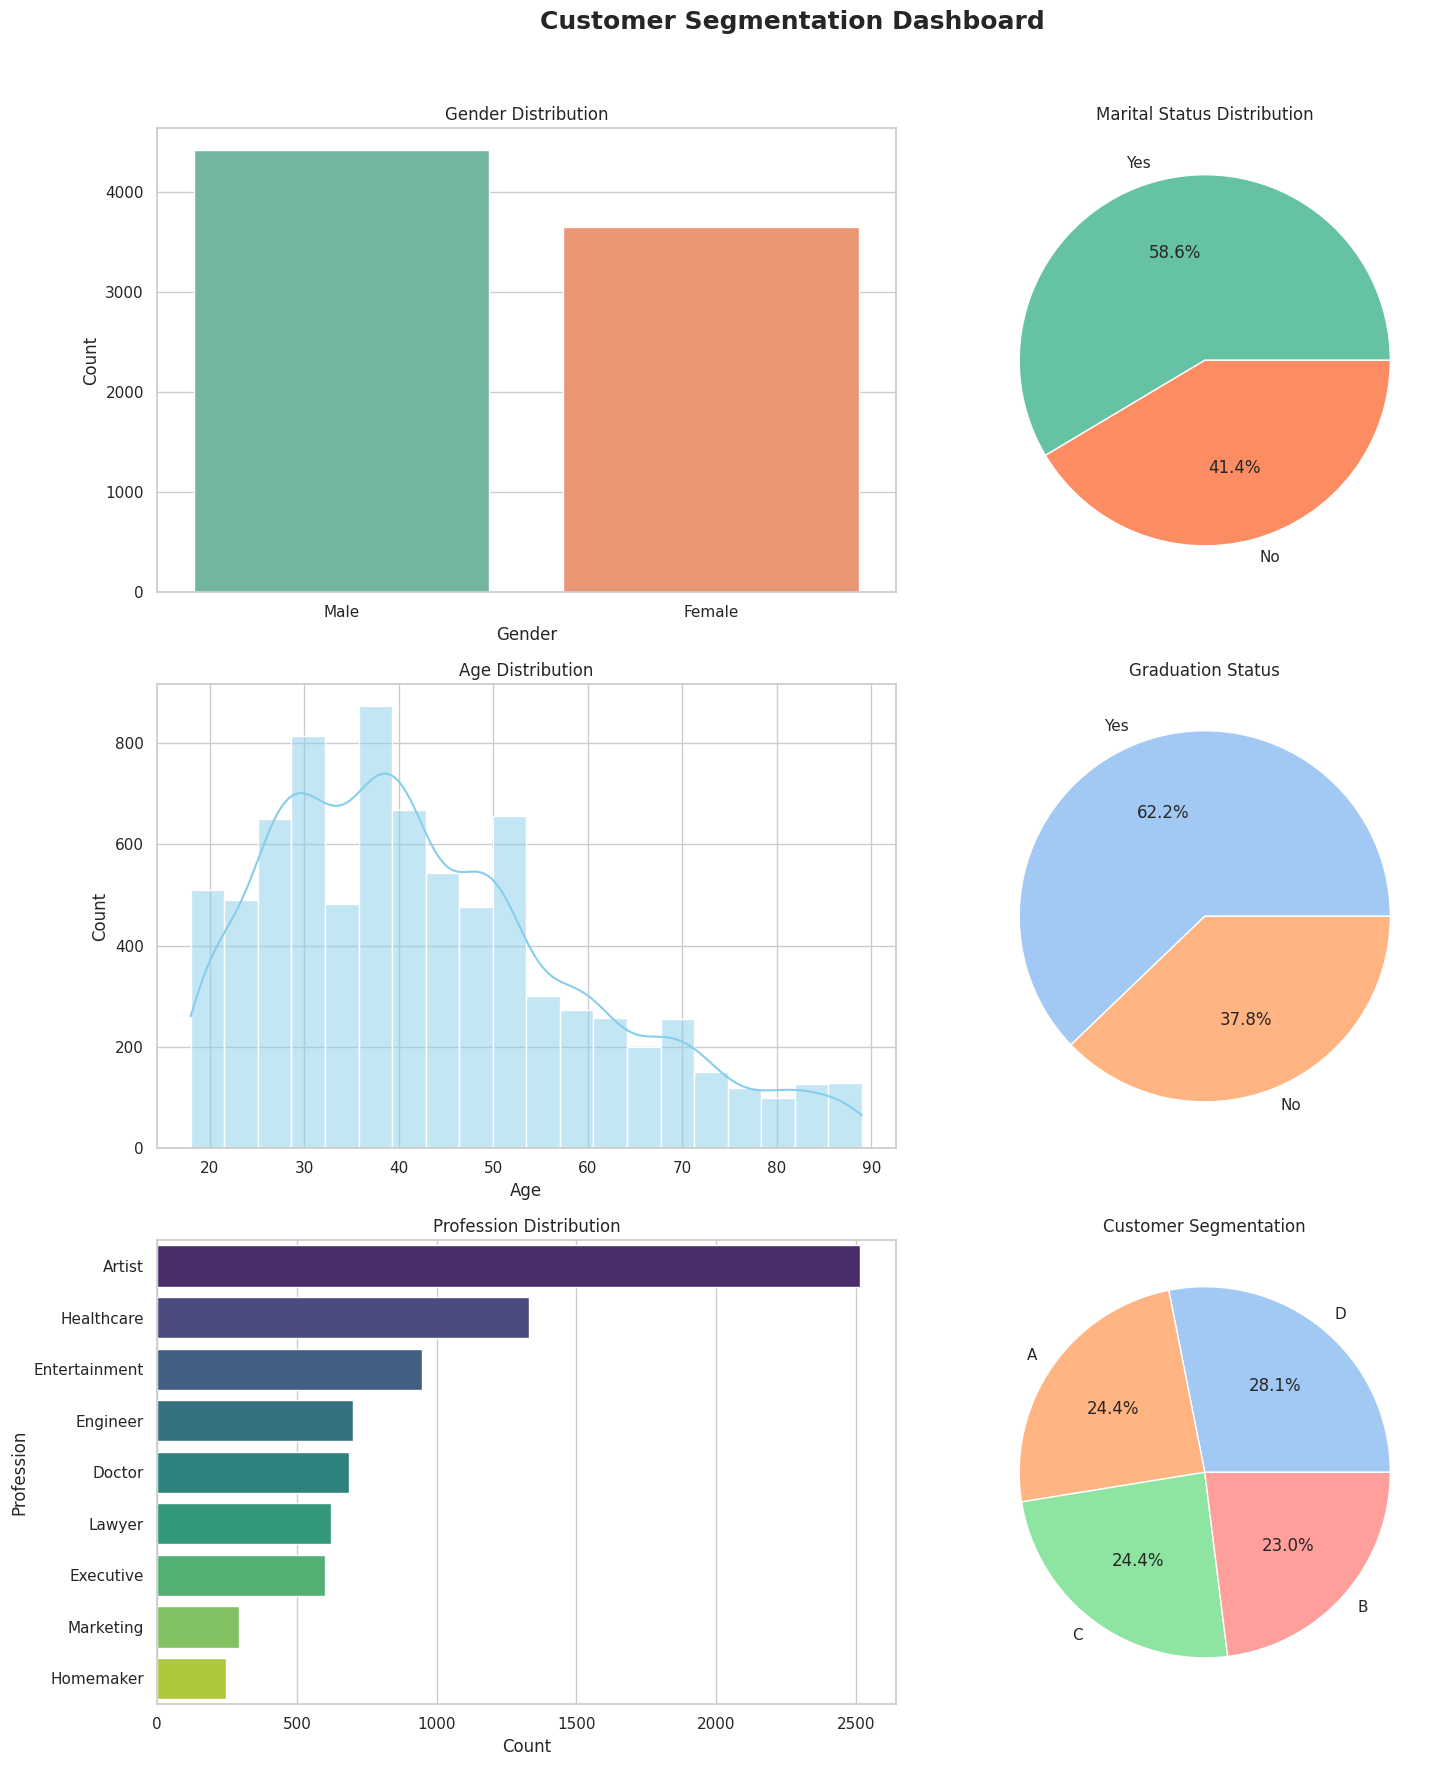

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df = pd.read_csv('Train.csv')  # Replace with your actual file path if different

fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Customer Segmentation Dashboard', fontsize=18, fontweight='bold')

# 1. Gender Distribution
sns.countplot(data=df, x='Gender', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Count')

# 2. Marital Status Pie Chart
married_counts = df['Ever_Married'].value_counts()
axs[0, 1].pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
axs[0, 1].set_title('Marital Status Distribution')

# 3. Age Histogram
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue', ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Count')

# 4. Graduation Status Pie Chart
grad_counts = df['Graduated'].value_counts()
axs[1, 1].pie(grad_counts, labels=grad_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axs[1, 1].set_title('Graduation Status')

# 5. Profession Distribution
sns.countplot(data=df, y='Profession', order=df['Profession'].value_counts().index, palette='viridis', ax=axs[2, 0])
axs[2, 0].set_title('Profession Distribution')
axs[2, 0].set_xlabel('Count')
axs[2, 0].set_ylabel('Profession')

# 6. Segmentation Pie Chart (only if column exists)
if 'Segmentation' in df.columns:
    seg_counts = df['Segmentation'].value_counts()
    axs[2, 1].pie(seg_counts, labels=seg_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    axs[2, 1].set_title('Customer Segmentation')
else:
    axs[2, 1].axis('off')  # Hide the last chart space if not available

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()
